## What are Outliers:
### Outliers are the points in the dataset that varies insignificatnly from the other data points. Either it may be too high or two low from the nearest bounds of the data. For example if you are analysing a feature called time(in hr.) of study in a day and found 35 hours in the data so practically it is not possible to study 35hr in a day so it is treated as an outlier.


## How to identify Outliers:
### 1. By Sorting: The most usual way is to sort the data and analyze the points that are notably diffrernt from the trend.
### 2. By using Visualization: We can use Boxplot, Histograms and scatterplot to identify the outliers.
### 3. By Using Z-score: This is generally used for gaussian distribution. Any points that lies outside the Z-score of +3 or -3 is considered as outlier.
### 4. By using IQR: We can build the lower fence and upper fence using the IQR and then find the points in the dataset that falls behind the lower fence and the upper fence. These points will be considered as outliers.

## Now what to do with the outliers:

### Once we find the outliers it's difficult to decide what to do with them. The bad side of outliers is they cause problems in the statistical analyses as the mean and standard deviation is greatly affected by outliers. The presense of outliers can change the normality of the distribution if they are not randomly distributed.In these cases we need to remove or cap the outliers.

### But not all the outliers are same. In some cases outliers can be useful for the data. For example in anamoly detection model can learn from the outliers.
### To understand what to do with the outliers we need to know how and from where did outliers come. 
### Here we are focusing in detection,removal and cappimg the outliers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Outliers using Z-score (For Normally Distributed data)

In [3]:
df=pd.read_csv('placement.csv')

In [4]:
df.head()

cgpa  placement_exam_marks  placed
0  7.19                  26.0       1
1  7.46                  38.0       1
2  7.54                  40.0       1
3  6.42                   8.0       1
4  7.23                  17.0       0

In [5]:
df.shape

(1000, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [7]:
df.describe().transpose()

count      mean        std   min    25%    50%    75%  \
cgpa                  1000.0   6.96124   0.615898  4.89   6.55   6.96   7.37   
placement_exam_marks  1000.0  32.22500  19.130822  0.00  17.00  28.00  44.00   
placed                1000.0   0.48900   0.500129  0.00   0.00   0.00   1.00   

                         max  
cgpa                    9.12  
placement_exam_marks  100.00  
placed                  1.00

Here we can see if the difference between 75% and max is large enough than it predicts the possibility of presence of outliers.

1. By Sorting the data

In [8]:
sorted(df['cgpa'])

[4.89,
 4.9,
 4.92,
 5.23,
 5.27,
 5.42,
 5.48,
 5.48,
 5.51,
 5.52,
 5.56,
 5.56,
 5.58,
 5.62,
 5.64,
 5.65,
 5.66,
 5.68,
 5.69,
 5.7,
 5.72,
 5.72,
 5.72,
 5.73,
 5.73,
 5.74,
 5.74,
 5.74,
 5.77,
 5.77,
 5.78,
 5.81,
 5.82,
 5.83,
 5.86,
 5.86,
 5.9,
 5.9,
 5.91,
 5.91,
 5.91,
 5.91,
 5.92,
 5.92,
 5.94,
 5.94,
 5.95,
 5.95,
 5.96,
 5.97,
 5.97,
 5.98,
 5.99,
 5.99,
 6.0,
 6.0,
 6.01,
 6.02,
 6.02,
 6.03,
 6.03,
 6.04,
 6.04,
 6.05,
 6.05,
 6.05,
 6.06,
 6.06,
 6.07,
 6.07,
 6.08,
 6.08,
 6.1,
 6.1,
 6.1,
 6.1,
 6.11,
 6.11,
 6.12,
 6.12,
 6.12,
 6.12,
 6.13,
 6.13,
 6.13,
 6.13,
 6.14,
 6.14,
 6.15,
 6.16,
 6.16,
 6.16,
 6.16,
 6.17,
 6.17,
 6.17,
 6.17,
 6.18,
 6.18,
 6.19,
 6.19,
 6.19,
 6.19,
 6.2,
 6.2,
 6.2,
 6.21,
 6.21,
 6.22,
 6.22,
 6.22,
 6.22,
 6.23,
 6.23,
 6.23,
 6.23,
 6.23,
 6.23,
 6.24,
 6.24,
 6.24,
 6.24,
 6.24,
 6.24,
 6.24,
 6.25,
 6.25,
 6.25,
 6.26,
 6.26,
 6.26,
 6.26,
 6.27,
 6.27,
 6.27,
 6.28,
 6.28,
 6.28,
 6.29,
 6.29,
 6.29,
 6.29,
 6.29,
 6.29,
 6.3,

In [9]:
sorted(df['placement_exam_marks'])

[0.0,
 2.0,
 2.0,
 2.0,
 3.0,
 3.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0,

2.By using the Boxplots we can see the outliers.

Text(0.5, 1.0, 'placement_exam_marks')

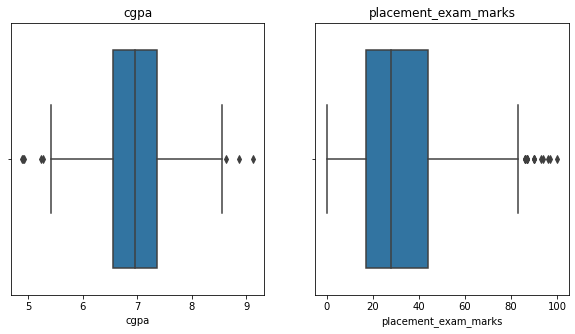

In [10]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.boxplot(df['cgpa'])
plt.title('cgpa')
plt.subplot(122)
sns.boxplot(df['placement_exam_marks'])
plt.title('placement_exam_marks')
    

<AxesSubplot:xlabel='placement_exam_marks', ylabel='Density'>

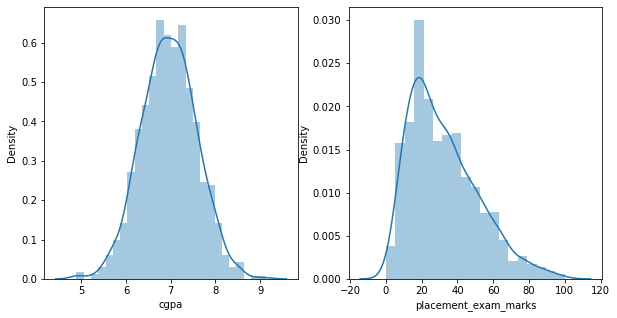

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.distplot(df['cgpa'])

plt.subplot(122)
sns.distplot(df['placement_exam_marks'])

The above distribution confirms taht the 'cgpa' column is normally distributed so w ecan use z-score method to detect outliers. Similarly for the 'placement_exam_marks' we can use iqr to detect the outliers.

In [12]:
df['cgpa'].skew()

-0.014529938929314918

In [13]:
#Making a column for z-score values of cgpa

df['cgpa_z_score']= (df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()
df.head()

cgpa  placement_exam_marks  placed  cgpa_z_score
0  7.19                  26.0       1      0.371425
1  7.46                  38.0       1      0.809810
2  7.54                  40.0       1      0.939701
3  6.42                   8.0       1     -0.878782
4  7.23                  17.0       0      0.436371

In [14]:
#filtering out the outliers from the dataset

df[(df['cgpa_z_score']>3) |(df['cgpa_z_score']<-3)]

cgpa  placement_exam_marks  placed  cgpa_z_score
485  4.92                  44.0       1     -3.314251
995  8.87                  44.0       1      3.099150
996  9.12                  65.0       1      3.505062
997  4.89                  34.0       0     -3.362960
999  4.90                  10.0       1     -3.346724

In [15]:
#Removing the Outliers from cgpa column

new_df2=df[(df['cgpa_z_score']<3) &(df['cgpa_z_score']>-3)]
new_df2.drop(['cgpa_z_score'],axis=1)

cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
991  7.04                  57.0       0
992  6.26                  12.0       0
993  6.73                  21.0       1
994  6.48                  63.0       0
998  8.62                  46.0       1

[995 rows x 3 columns]

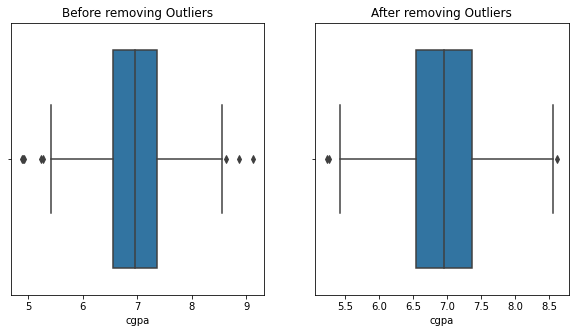

In [16]:
#Comparsion of boxplots before and after removing the outliers
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.boxplot(df['cgpa'])
plt.title('Before removing Outliers')
plt.subplot(122)
sns.boxplot(new_df2['cgpa'])
plt.title('After removing Outliers')
plt.show()

In [17]:
#Calculating the extreme bounds
upper_bound=df['cgpa'].mean()+3*df['cgpa'].std()
lower_bound=df['cgpa'].mean()-3*df['cgpa'].std()

In [18]:
#Capping the outliers with the extreme bounds
df['cgpa'] = np.where(
    df['cgpa']>upper_bound,
    upper_bound,
    np.where(
        df['cgpa']<lower_bound,
        lower_bound,
        df['cgpa']
    )
)

<AxesSubplot:xlabel='cgpa'>

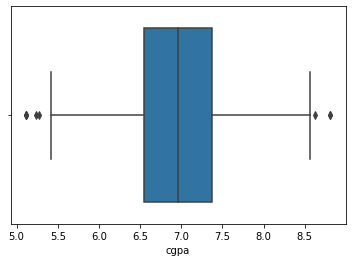

In [19]:
sns.boxplot(df['cgpa'])

Now we will treat the outliers in the 'placement_exam_marks' columns

In [20]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

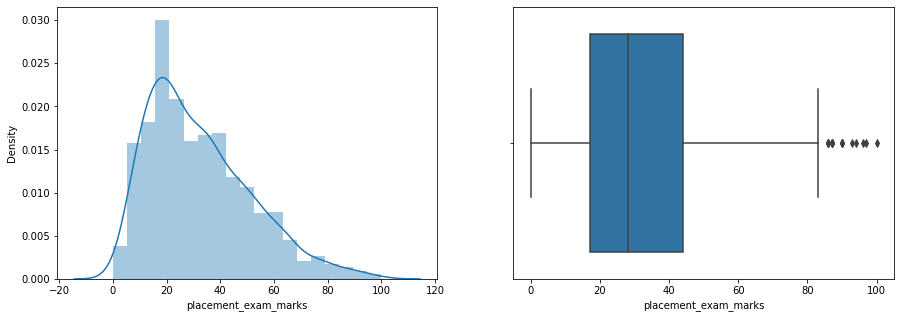

In [21]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.distplot(df['placement_exam_marks'])

plt.subplot(122)
sns.boxplot(df['placement_exam_marks'])

plt.show()

As outliers are present and the data is not normally distributed we will use th IQR method to detect and cap th outliers.

In [22]:
#1.Sort the dataset
df['placement_exam_marks']=sorted(df['placement_exam_marks'])

In [23]:
#2. Finding the Quartiles(q1 & q3)
q1,q3=np.percentile(df['placement_exam_marks'],[25,75]) 
q1,q3

(17.0, 44.0)

In [24]:
#3. calculating the IQR and the extreme limits

IQR=q3-q1

Lower_fence= q1-(1.5*IQR)                        
Higher_fence= q3+(1.5*IQR)

Lower_fence,Higher_fence

(-23.5, 84.5)

In [25]:
#4. Identifying the outliers in the dataset.

df[(df['placement_exam_marks']> Higher_fence) | (df['placement_exam_marks']< Lower_fence)]

cgpa  placement_exam_marks  placed  cgpa_z_score
985  7.100000                  86.0       0      0.225297
986  7.090000                  86.0       1      0.209061
987  6.770000                  86.0       0     -0.310506
988  5.640000                  87.0       1     -2.145226
989  6.230000                  87.0       0     -1.187275
990  6.170000                  87.0       1     -1.284694
991  7.040000                  87.0       0      0.127878
992  6.260000                  90.0       0     -1.138565
993  6.730000                  90.0       1     -0.375452
994  6.480000                  90.0       0     -0.781363
995  8.808934                  93.0       1      3.099150
996  8.808934                  94.0       1      3.505062
997  5.113546                  96.0       0     -3.362960
998  8.620000                  97.0       1      2.693239
999  5.113546                 100.0       1     -3.346724

In [26]:
# Removing the Outliers
df_new = df[(df['placement_exam_marks']<Higher_fence) & (df['placement_exam_marks']> Lower_fence)]
df_new.shape

(985, 4)

In [27]:
df_new['placement_exam_marks'].describe()

count    985.000000
mean      31.339086
std       17.857633
min        0.000000
25%       17.000000
50%       28.000000
75%       43.000000
max       83.000000
Name: placement_exam_marks, dtype: float64

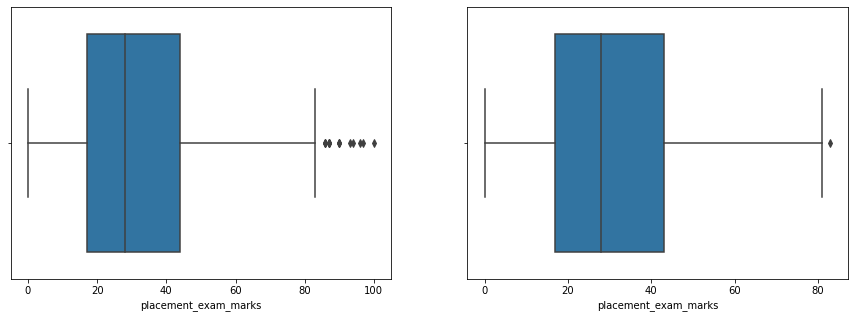

In [28]:
#Comparsion of boxplots before and after removing the outliers
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(122)
sns.boxplot(df_new['placement_exam_marks'])

plt.show()

In [29]:
# Capping the Outliers with extreme values

df_new_cap = df.copy()

df_new_cap['placement_exam_marks'] = np.where(
    df_new_cap['placement_exam_marks'] > Higher_fence,
    Higher_fence,
    np.where(
        df_new_cap['placement_exam_marks'] < Lower_fence,
        Lower_fence,
        df_new_cap['placement_exam_marks']
    )
)

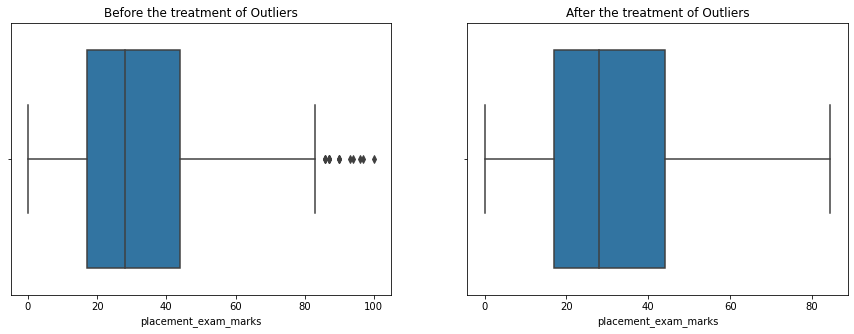

In [30]:
#Comparsion of boxplots before and after capping the outliers

plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df['placement_exam_marks'])
plt.title('Before the treatment of Outliers')

plt.subplot(122)
sns.boxplot(df_new_cap['placement_exam_marks'])
plt.title('After the treatment of Outliers')

plt.show()